In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Load the data
file_path = 'RFLFSODataFull.csv'
data = pd.read_csv(file_path)
print(data.dtypes)

FSO_Att                  float64
RFL_Att                  float64
AbsoluteHumidity         float64
AbsoluteHumidityMax      float64
AbsoluteHumidityMin      float64
Distance                 float64
Frequency                  int64
Particulate              float64
ParticulateMax           float64
ParticulateMin           float64
RainIntensity            float64
RainIntensityMax         float64
RainIntensityMin         float64
RelativeHumidity         float64
SYNOPCode                  int64
Temperature              float64
TemperatureDifference    float64
TemperatureMax           float64
TemperatureMin           float64
Time                       int64
Visibility               float64
VisibilityMax            float64
VisibilityMin            float64
WindDirection            float64
WindSpeed                float64
WindSpeedMax             float64
WindSpeedMin             float64
dtype: object


In [ ]:
# Convert to a classification type
data['SYNOPCode'] = data['SYNOPCode'].astype('category')
print(data.dtypes)

FSO_Att                   float64
RFL_Att                   float64
AbsoluteHumidity          float64
AbsoluteHumidityMax       float64
AbsoluteHumidityMin       float64
Distance                  float64
Frequency                   int64
Particulate               float64
ParticulateMax            float64
ParticulateMin            float64
RainIntensity             float64
RainIntensityMax          float64
RainIntensityMin          float64
RelativeHumidity          float64
SYNOPCode                category
Temperature               float64
TemperatureDifference     float64
TemperatureMax            float64
TemperatureMin            float64
Time                        int64
Visibility                float64
VisibilityMax             float64
VisibilityMin             float64
WindDirection             float64
WindSpeed                 float64
WindSpeedMax              float64
WindSpeedMin              float64
dtype: object


In [118]:
data

FSO_Att    RFL_Att  AbsoluteHumidity  AbsoluteHumidityMax  \
0       7.913289   6.927868         17.595709            17.615907   
1       7.451176   4.412096         17.549693            17.572415   
2       7.072747   6.268740         17.290230            17.644014   
3       6.949288   4.317853         16.820880            17.066776   
4       7.361052   6.114514         16.813820            17.953974   
...          ...        ...               ...                  ...   
91374   9.150012  11.968291         23.283256            24.142871   
91375   9.333777  11.538030         23.259618            25.104895   
91376   8.873168  11.491891         23.331697            23.996130   
91377   9.538886  11.526529         21.241027            21.624932   
91378  11.290048  11.611650         20.876100            22.581643   

       AbsoluteHumidityMin     Distance    Frequency  Particulate  \
0                17.340148  2115.338398  83500000000     0.000000   
1                17.299439  2113.999257  73500000000     0.000000   
2                16.037894  2118.689047  83500000000     0.000000   
3                15.895622  2114.632339  73500000000     0.000000   
4                15.227225  2116.786055  83500000000     0.000000   
...                    ...          ...          ...          ...   
91374            22.169805  3970.846129  83500000000     0.000000   
91375            21.005496  3969.230652  73500000000     0.000000   
91376            22.148649  3968.373512  83500000000     0.000000   
91377            20.736391  3967.550165  73500000000    29.693160   
91378            19.785652  3969.829548  83500000000    53.697748   

       ParticulateMax  ParticulateMin  ...  TemperatureMax  TemperatureMin  \
0            0.000000        0.000000  ...       26.603030       24.680849   
1            0.000000        0.000000  ...       26.377164       24.313108   
2            0.000000        0.000000  ...       27.670822       23.150277   
3            0.000000        0.000000  ...       26.522100       23.174815   
4            0.000000        0.000000  ...       26.305736       24.864100   
...               ...             ...  ...             ...             ...   
91374        0.000000        0.000000  ...       27.257926       26.013205   
91375        0.000000        0.000000  ...       28.101044       25.032282   
91376        0.000000        0.000000  ...       28.249678       26.205773   
91377       30.761540       28.497137  ...       26.880084       25.031934   
91378       58.066729       49.739824  ...       25.628530       22.694495   

       Time    Visibility VisibilityMax  VisibilityMin  WindDirection  \
0         9  65884.518460  72336.362233   65617.543754      88.755450   
1         9  64963.410920  68753.386153   60379.327485      99.790057   
2        10  54794.281070  54821.773817   50850.155963      65.730085   
3        10  50205.641590  52519.927530   45374.510898      88.127497   
4        10  59038.325990  64418.329138   54461.246506      84.167414   
...     ...           ...           ...            ...            ...   
91374     4  13041.847800  13458.340663   12411.852994      91.391749   
91375     4  15959.633590  16232.735439   15345.485232      47.997946   
91376     4  13129.663750  13948.560177   11925.979953     103.963102   
91377     5  15082.787860  15522.762221   14842.654291      82.090779   
91378     5   7321.574274   7546.606219    7045.985361      93.243162   

       WindSpeed  WindSpeedMax  WindSpeedMin  
0       3.057066      6.863808      3.007939  
1       2.727910      6.468903      2.537393  
2       1.674810      2.826916      1.640809  
3       0.962068      2.780643      0.886951  
4       1.881007      4.476298      1.874052  
...          ...           ...           ...  
91374   0.000000      0.027596      0.000000  
91375   0.075640      0.349551      0.069834  
91376   0.052282      0.178062      0.049824  
91377   0.443520      1.838449      0.413146  
91378   

In [ ]:
sampled_data = data
categories = sampled_data['SYNOPCode'].cat.categories
category_counts = sampled_data['SYNOPCode'].value_counts()
print(category_counts)
print(categories)

SYNOPCode
0    56964
6    25018
5     6605
8     1716
4      466
7      419
3      191
Name: count, dtype: int64
Index([0, 3, 4, 5, 6, 7, 8], dtype='int64')


# Feature screening function

In [ ]:
def feature_removal_analysis(data, target_column, drop_columns):
    results = []
    removed_features = []

    # Defines the feature set and removes the specified column
    X = data.drop(columns=[target_column] + [drop_columns])
    y = data[target_column]
    S = list(X.columns)

    # Initialize the random forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

    while len(S) > 0:
        # Train the model using the current feature set
        rf.fit(X[S], y)
        y_pred = rf.predict(X[S])

        # Calculation performance index
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        r2 = r2_score(y, y_pred)

        # Records the current feature set, RMSE, and R2
        results.append((S.copy(), rmse, r2))
        print(f"Remaining features: {S}")

        # If there's only one feature left, get out of the loop
        if len(S) == 1:
            break

        # Identify the least important features
        importances = rf.feature_importances_
        least_important = np.argmin(importances)

        # Remove the least important feature from the feature set
        removed_feature = S.pop(least_important)
        removed_features.append(removed_feature)
        print(f"Removed feature: {removed_feature}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

    results_df = pd.DataFrame(results, columns=['Features', 'RMSE', 'R2'])

    # Extract the RMSE and R2 values
    rmse_values = results_df['RMSE'].tolist()
    r2_values = results_df['R2'].tolist()

    assert len(rmse_values) == len(removed_features) + 1
    assert len(r2_values) == len(removed_features) + 1


    fig, ax1 = plt.subplots(figsize=(14, 8))
    color = 'tab:blue'
    ax1.set_xlabel('Removed Feature', fontsize=23)
    ax1.set_ylabel('RMSE', color=color, fontsize=23)
    ax1.plot(range(len(rmse_values)), rmse_values, color=color, marker='o', label='RMSE')
    ax1.tick_params(axis='y', labelcolor=color, labelsize=16)
    ax1.tick_params(axis='x', labelsize=16)
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('R2', color=color, fontsize=23)
    ax2.plot(range(len(r2_values)), r2_values, color=color, marker='o', label='R2')
    ax2.tick_params(axis='y', labelcolor=color, labelsize=16)
    ax2.grid(False)

    ax1.set_xticks(range(len(removed_features) + 1))
    ax1.set_xticklabels(['All Features'] + removed_features, rotation=90, ha='center', fontsize=22)

    if target_column == 'FSO_Att':
        plt.title('FSO Model - RMSE and R2 vs Removed Feature', fontsize=26, fontweight='bold' )
    elif target_column == 'RFL_Att':
        plt.title('RF Model - RMSE and R2 vs Removed Feature', fontsize=26, fontweight='bold')

    plt.tight_layout()
    plt.show()

    return results_df, results_df['Features']


# Identify important features of the general model

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: Frequency, RMSE: 0.2817, R2: 0.9948
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: RainIntensityMin, RMSE: 0.2819, R2: 0.9948
Remain

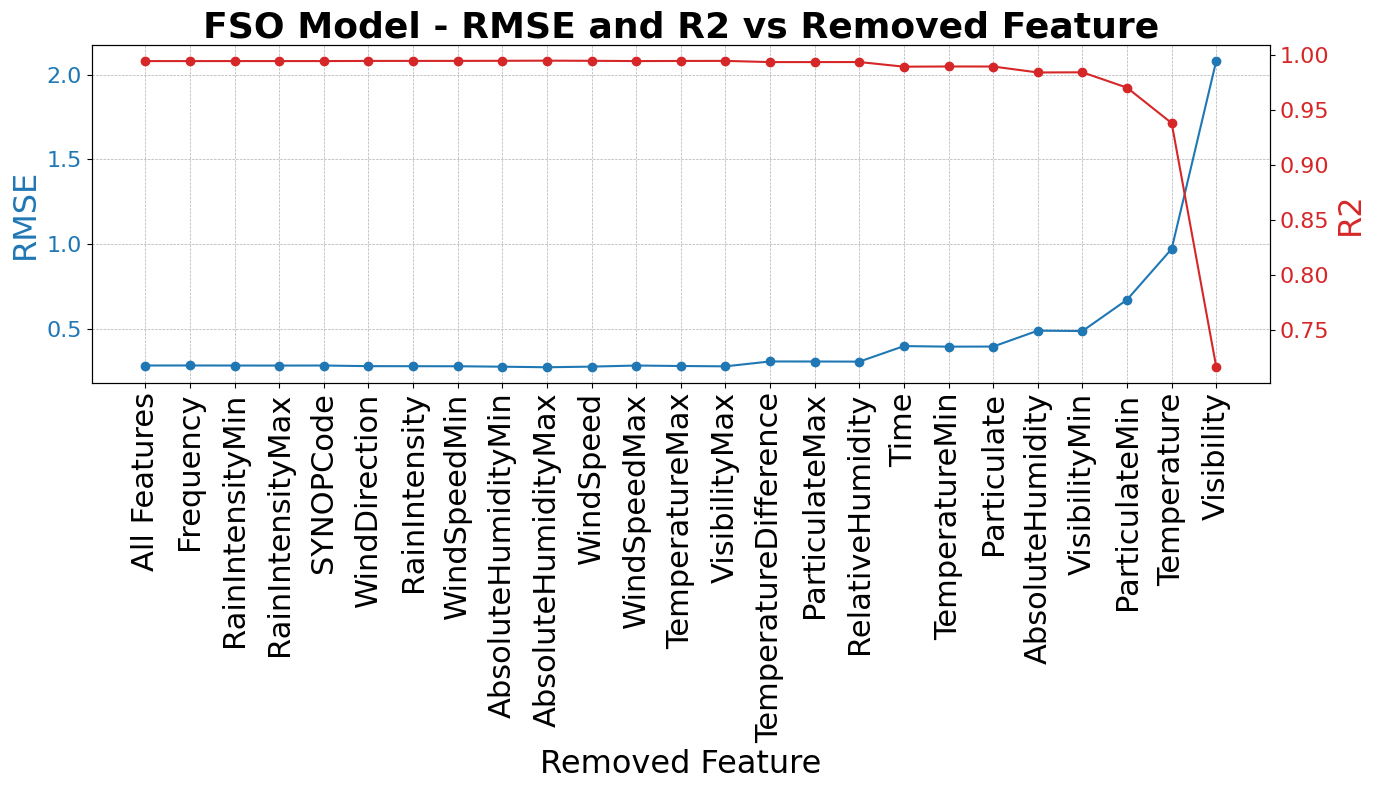

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: WindDirection, RMSE: 0.1796, R2: 0.9973
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: WindSpeedMin, RMSE: 0.1794, R2: 0.9973
Remaining 

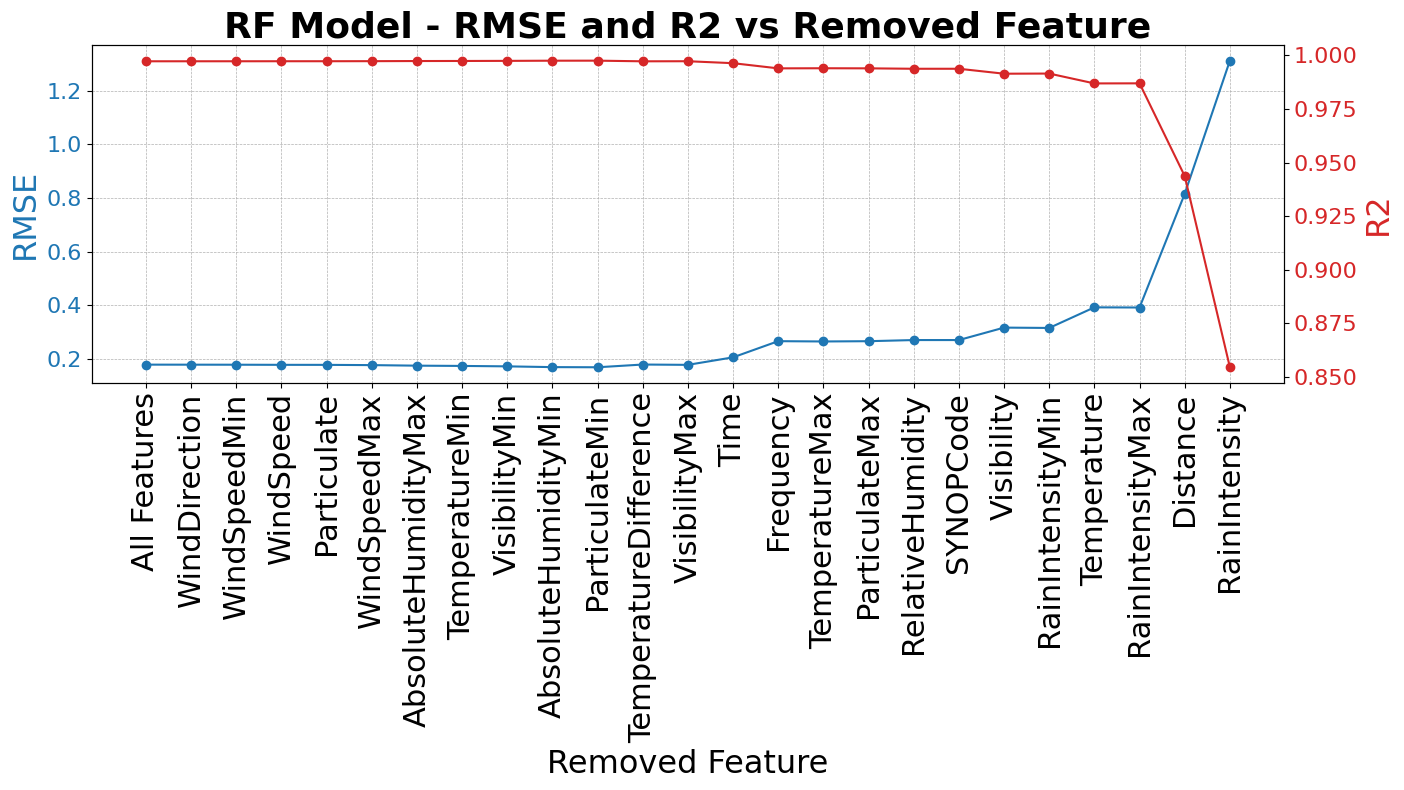

In [ ]:
performance_fso = feature_removal_analysis(sampled_data, 'FSO_Att', 'RFL_Att')
performance_rfl = feature_removal_analysis(sampled_data, 'RFL_Att', 'FSO_Att')

performance_fso: ['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMin', 'RelativeHumidity', 'Temperature', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMin'] <br>
performance_rf: ['AbsoluteHumidity', 'Distance', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'SYNOPCode', 'Temperature', 'Visibility']

In [ ]:
# Split data set
data_0 = sampled_data[sampled_data['SYNOPCode'] == 0]
data_3 = sampled_data[sampled_data['SYNOPCode'] == 3]
data_4 = sampled_data[sampled_data['SYNOPCode'] == 4]
data_5 = sampled_data[sampled_data['SYNOPCode'] == 5]
data_6 = sampled_data[sampled_data['SYNOPCode'] == 6]
data_7 = sampled_data[sampled_data['SYNOPCode'] == 7]
data_8 = sampled_data[sampled_data['SYNOPCode'] == 8]

In [123]:
print("0:", data_0.shape)
print("3:", data_3.shape)
print("4:", data_4.shape)
print("5:", data_5.shape)
print("6:", data_6.shape)
print("7:", data_7.shape)
print("8:", data_8.shape)


0: (56964, 27)
3: (191, 27)
4: (466, 27)
5: (6605, 27)
6: (25018, 27)
7: (419, 27)
8: (1716, 27)


# Identify important features of a special model

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: SYNOPCode, RMSE: 0.2910, R2: 0.9932
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: RainIntensity, RMSE: 0.2915, R2: 0.9931
Remaining

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: SYNOPCode, RMSE: 0.1344, R2: 0.9972
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: RainIntensityMax, RMSE: 0.1359, R2: 0.9972
Remain

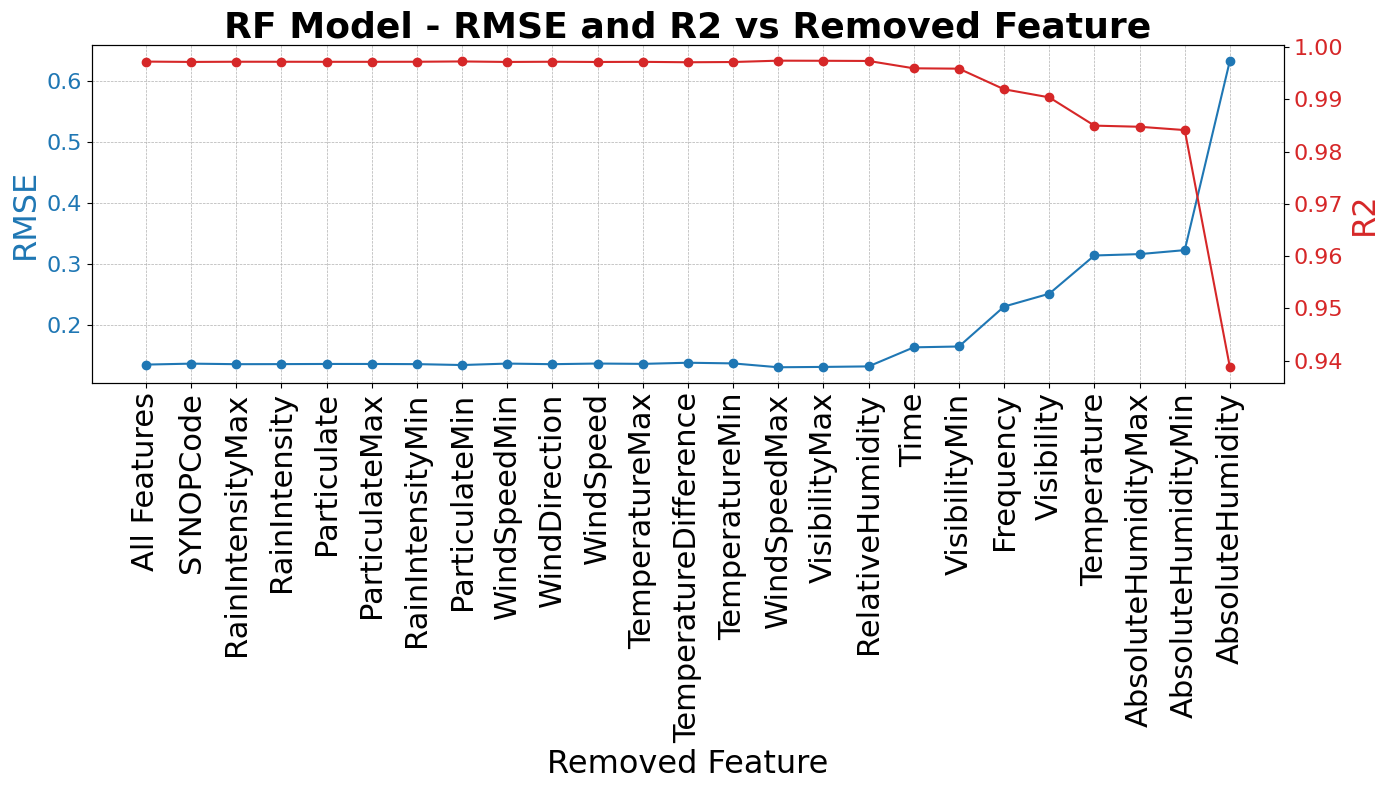

In [124]:
performance_fso_0 = feature_removal_analysis(data_0, 'FSO_Att', 'RFL_Att')
performance_rfl_0 = feature_removal_analysis(data_0, 'RFL_Att', 'FSO_Att')

data_0_fso: ['AbsoluteHumidity', 'Distance', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin']<br>
data_0_rf: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'RelativeHumidity', 'Temperature', 'Time', 'Visibility', 'VisibilityMin']

In [125]:
performance_fso_3 = feature_removal_analysis(data_3, 'FSO_Att', 'RFL_Att')
performance_rfl_3 = feature_removal_analysis(data_3, 'RFL_Att', 'FSO_Att')

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: Particulate, RMSE: 0.7158, R2: 0.9923
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: ParticulateMax, RMSE: 0.7406, R2: 0.9918
Remainin

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: Particulate, RMSE: 0.1844, R2: 0.9962
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: ParticulateMax, RMSE: 0.1887, R2: 0.9960
Remainin

data_3_fso: ['Distance', 'Temperature', 'VisibilityMax', 'VisibilityMin'] <br>
data_3_rf: ['AbsoluteHumidityMax', 'TemperatureMin', 'Time']

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: SYNOPCode, RMSE: 0.2256, R2: 0.9967
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: Frequency, RMSE: 0.2249, R2: 0.9968
Remaining fea

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: SYNOPCode, RMSE: 0.1824, R2: 0.9880
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: WindSpeed, RMSE: 0.1822, R2: 0.9880
Remaining fea

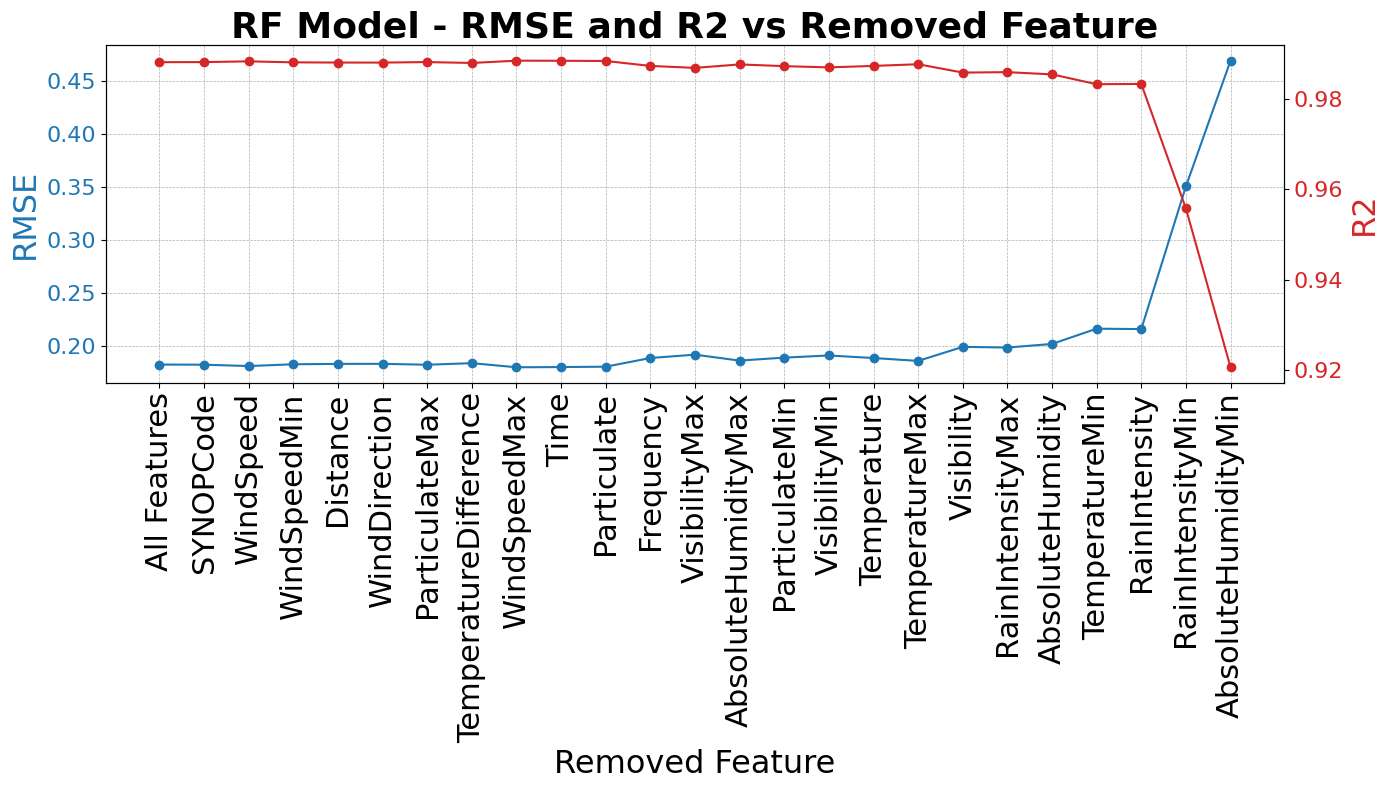

In [126]:
performance_fso_4 = feature_removal_analysis(data_4, 'FSO_Att', 'RFL_Att')
performance_rfl_4 = feature_removal_analysis(data_4, 'RFL_Att', 'FSO_Att')

data_4_fso： ['Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'Temperature', 'TemperatureMin', 'Visibility'] <br>
data_4_rf： ['AbsoluteHumidity', 'AbsoluteHumidityMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'TemperatureMax', 'TemperatureMin', 'Visibility']

In [127]:
performance_fso_5 = feature_removal_analysis(data_5, 'FSO_Att', 'RFL_Att')
performance_rfl_5 = feature_removal_analysis(data_5, 'RFL_Att', 'FSO_Att')

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: SYNOPCode, RMSE: 0.3123, R2: 0.9924
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: Frequency, RMSE: 0.3100, R2: 0.9925
Remaining fea

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: SYNOPCode, RMSE: 0.2012, R2: 0.9951
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: WindDirection, RMSE: 0.2000, R2: 0.9952
Remaining

data_5_fso: ['Distance', 'ParticulateMax', 'Temperature', 'Visibility', 'VisibilityMax'] <br>
data_5_rf: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'TemperatureDifference', 'Visibility']

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: SYNOPCode, RMSE: 0.2999, R2: 0.9952
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: Frequency, RMSE: 0.2996, R2: 0.9952
Remaining fea

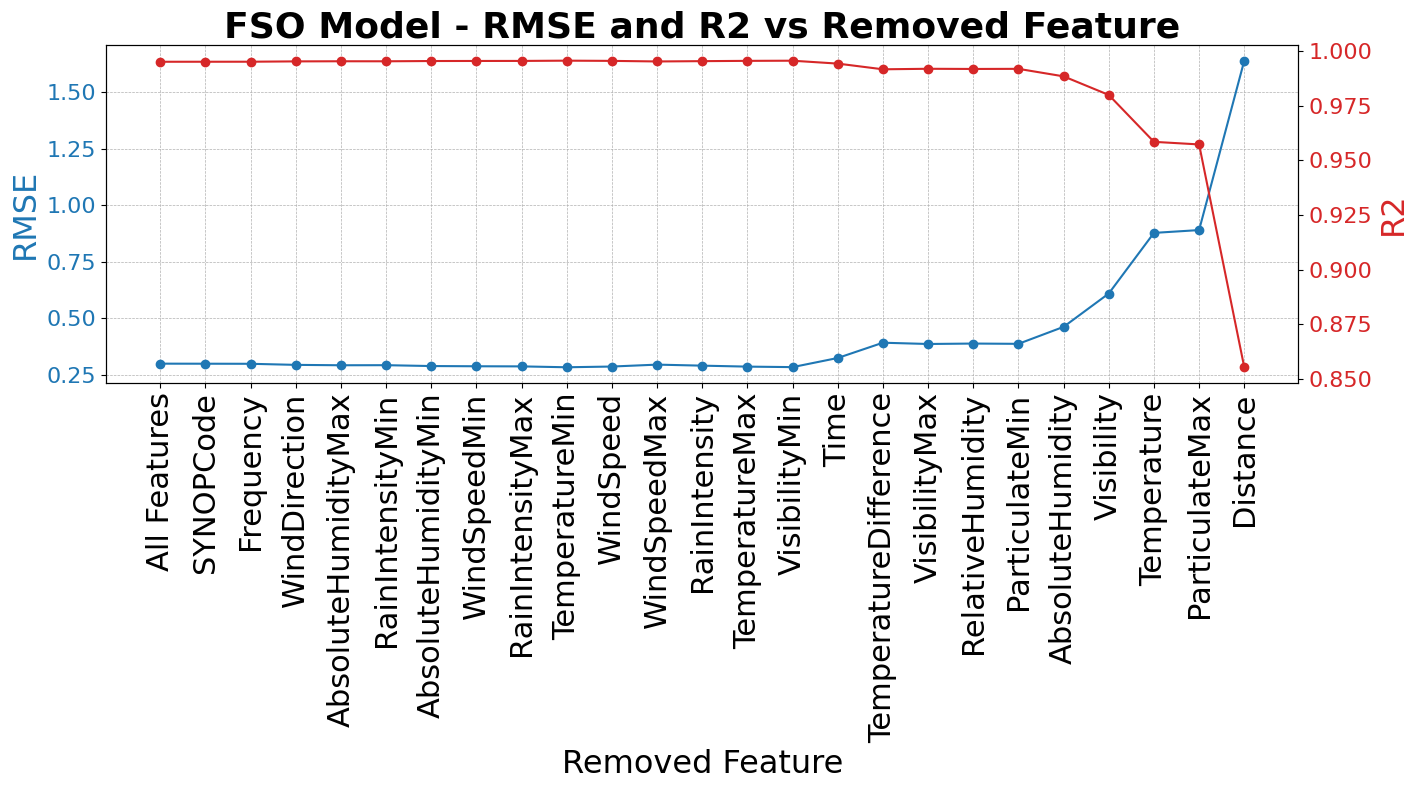

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: SYNOPCode, RMSE: 0.2521, R2: 0.9961
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: WindDirection, RMSE: 0.2532, R2: 0.9961
Remaining

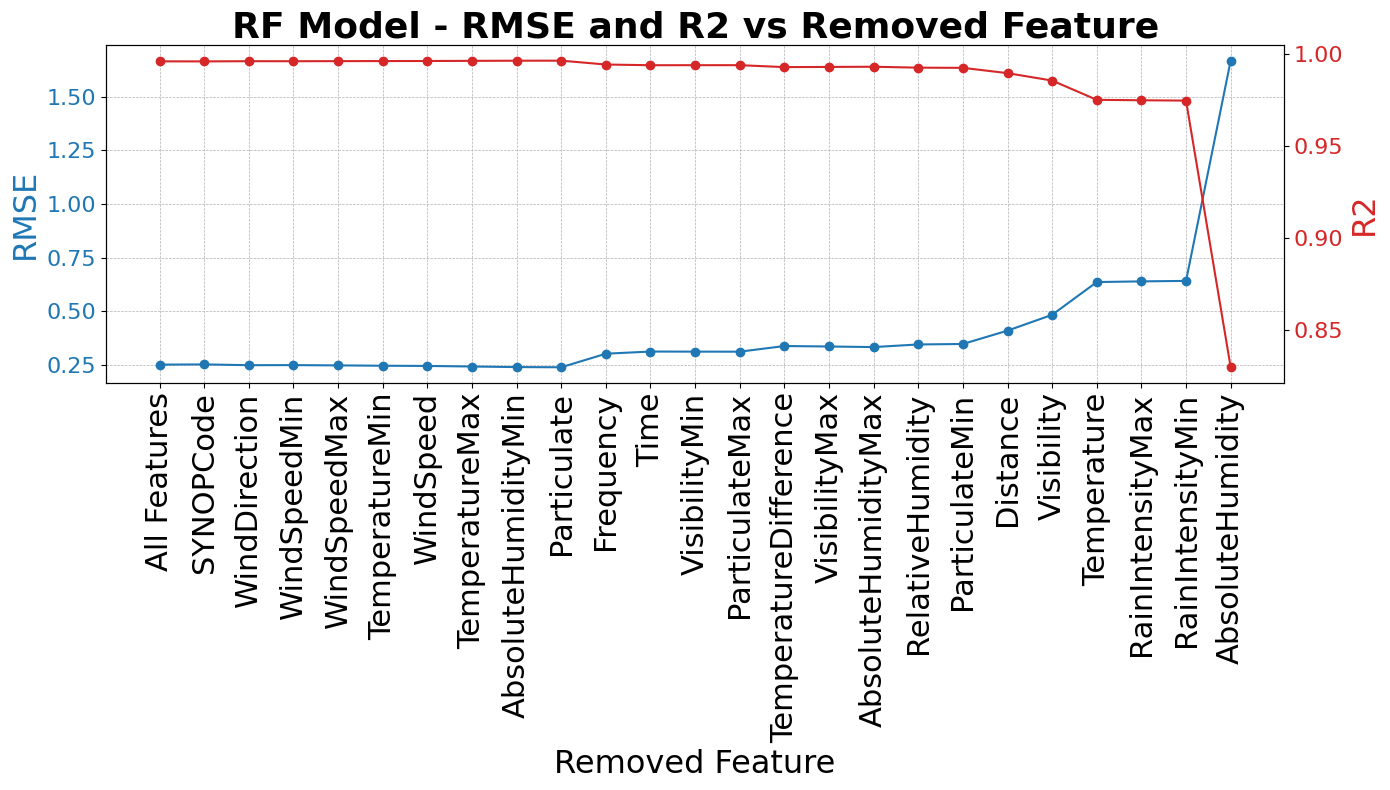

In [128]:
performance_fso_6 = feature_removal_analysis(data_6, 'FSO_Att', 'RFL_Att')
performance_rfl_6 = feature_removal_analysis(data_6, 'RFL_Att', 'FSO_Att')

data_6_fso: ['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'Temperature', 'Visibility']<br>
data_6_rf: ['AbsoluteHumidity', 'Distance', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'Temperature', 'Visibility']

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: SYNOPCode, RMSE: 0.4406, R2: 0.9931
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: Frequency, RMSE: 0.4346, R2: 0.9933
Remaining fea

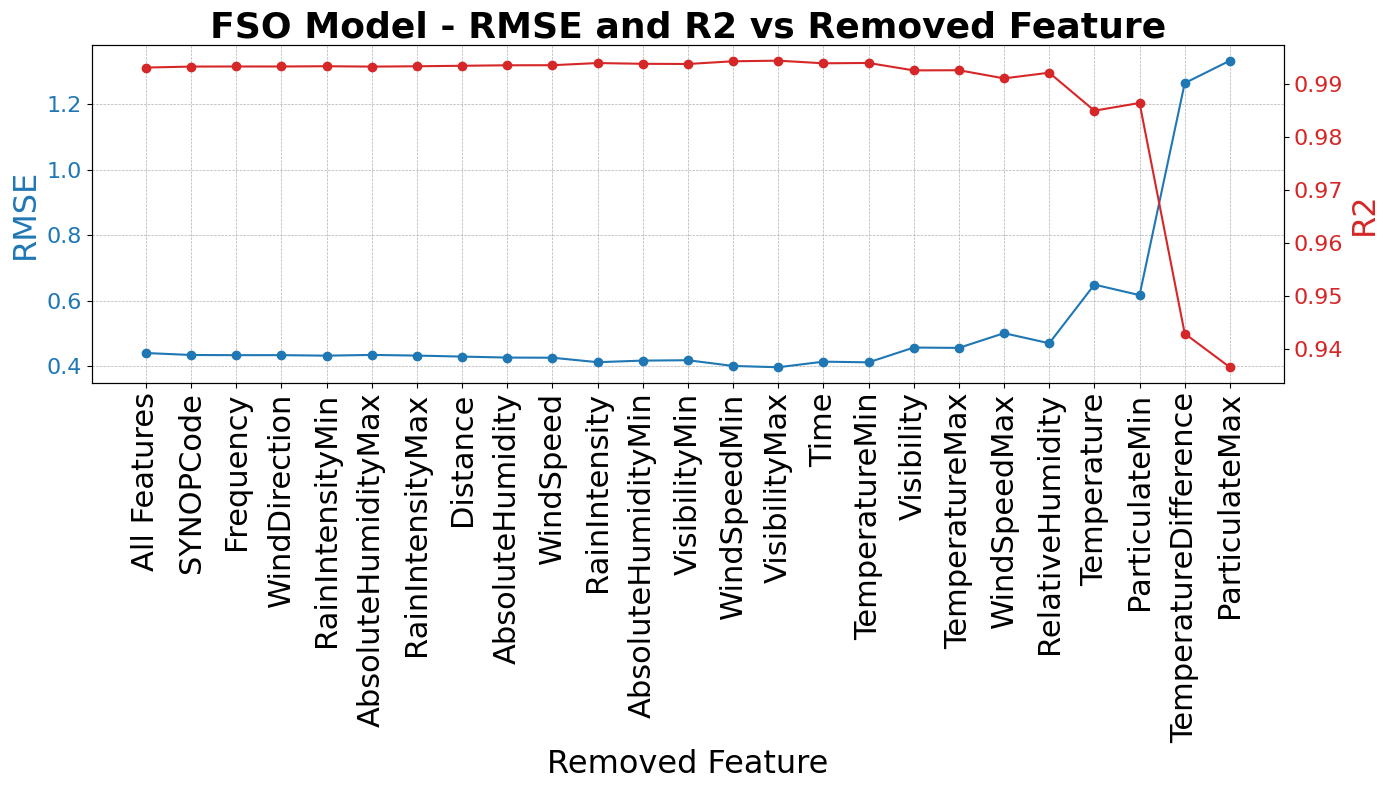

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: SYNOPCode, RMSE: 0.1163, R2: 0.9942
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: WindSpeedMin, RMSE: 0.1174, R2: 0.9941
Remaining 

In [129]:
performance_fso_7 = feature_removal_analysis(data_7, 'FSO_Att', 'RFL_Att')
performance_rfl_7 = feature_removal_analysis(data_7, 'RFL_Att', 'FSO_Att')

data_7_fso: ['Particulate', 'ParticulateMax', 'ParticulateMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference'] <br>
data_7_rf: ['AbsoluteHumidity', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'TemperatureDifference', 'Time', 'WindSpeedMax']

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: SYNOPCode, RMSE: 0.3189, R2: 0.9936
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: Frequency, RMSE: 0.3157, R2: 0.9937
Remaining fea

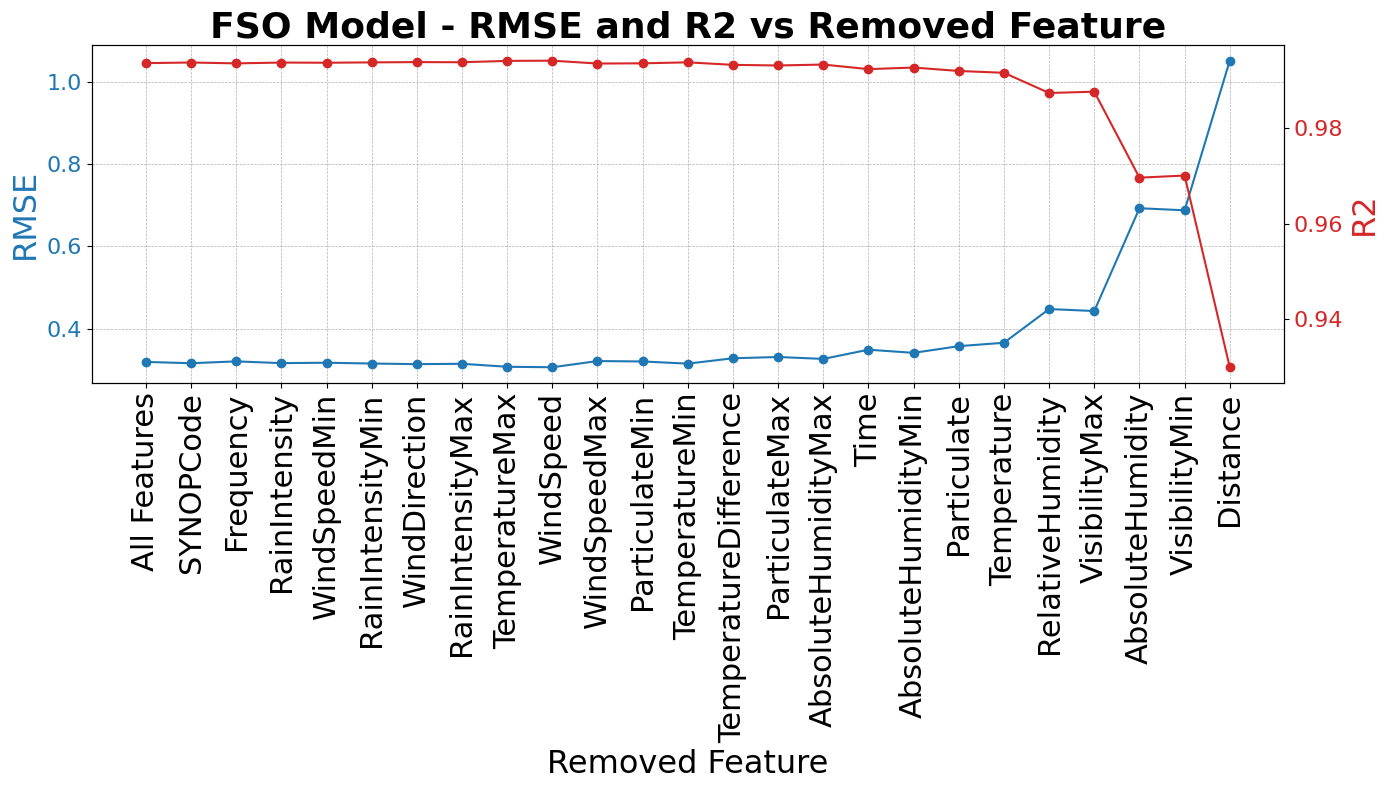

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: SYNOPCode, RMSE: 0.3275, R2: 0.9887
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
Removed feature: WindDirection, RMSE: 0.3254, R2: 0.9888
Remaining

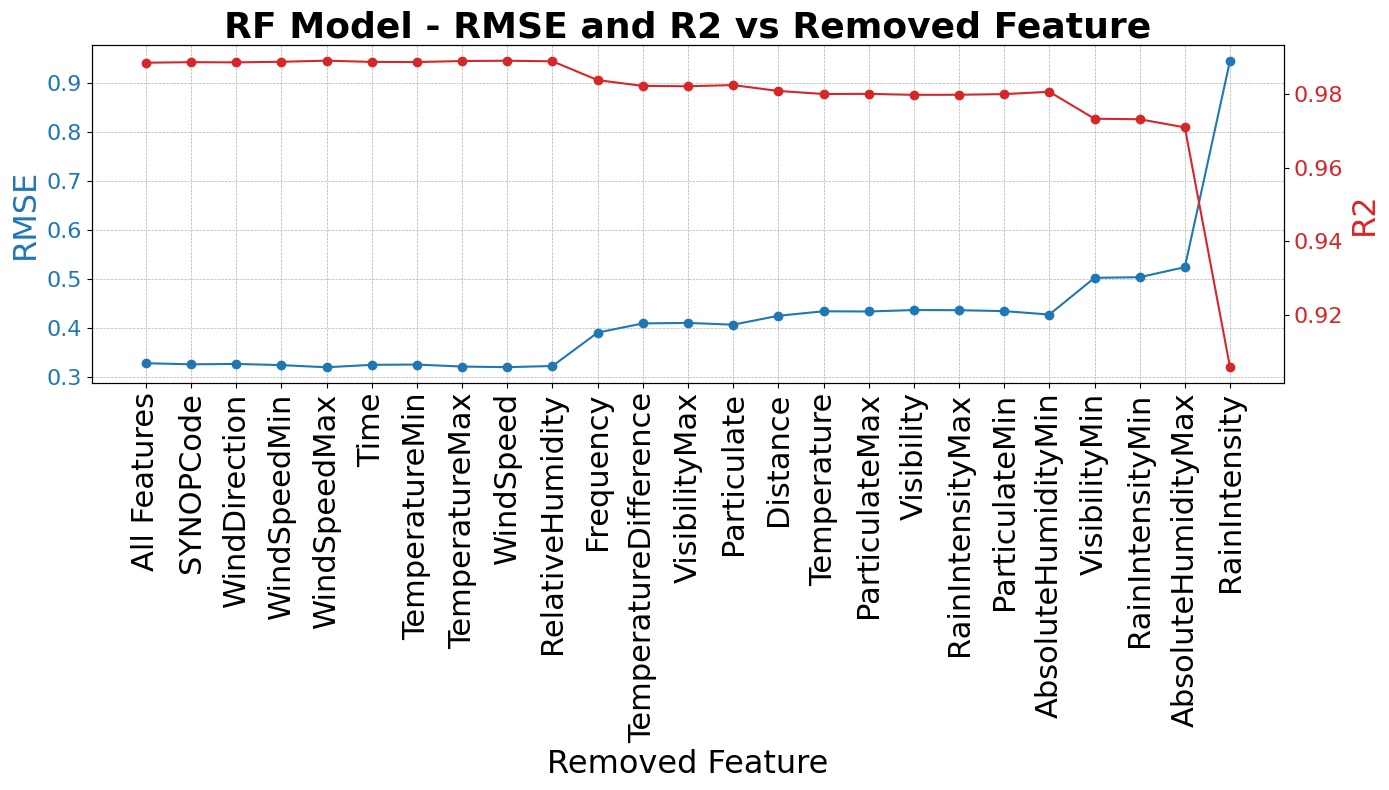

In [130]:
performance_fso_8 = feature_removal_analysis(data_8, 'FSO_Att', 'RFL_Att')
performance_rfl_8 = feature_removal_analysis(data_8, 'RFL_Att', 'FSO_Att')

data_8_fso: ['AbsoluteHumidity', 'Distance', 'RelativeHumidity', 'Temperature', 'Visibility', 'VisibilityMax', 'VisibilityMin'] <br>
data_8_rf: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'RainIntensity', 'RainIntensityMin', 'VisibilityMin']

# Create general model

In [ ]:
def evaluate_general_model(data, target_column, features):
    
    synop_code_column = 'SYNOPCode'

    # Divide the training set and test set
    X = data[features]
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define a hyperparameter grid for a random forest
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    # Use GridSearchCV to find the optimal hyperparameters
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the optimal hyperparameters
    best_params = grid_search.best_params_

    # Use optimal hyperparameters to train the model
    best_rf = grid_search.best_estimator_
    best_rf.fit(X_train, y_train)

    # Make predictions on the training set
    y_pred_train = best_rf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)

    print(f"Training Set Metrics: RMSE (train): {rmse_train:.4f}, R2 (train): {r2_train:.4f}")


    results = []
    categories = data[synop_code_column].unique()

    for category in categories:
        # Filter out the test data for the current category
        category_data = data[(data[synop_code_column] == category) & (data.index.isin(X_test.index))]
        X_category_test = category_data[features]
        y_category_test = category_data[target_column]

        # Make predictions on the test set
        y_pred_test = best_rf.predict(X_category_test)

        # Calculation performance index
        rmse_test = np.sqrt(mean_squared_error(y_category_test, y_pred_test))
        r2_test = r2_score(y_category_test, y_pred_test)

        # Records RMSE and R2 for the current category
        results.append((category, rmse_test, r2_test))
        print(f"Category: {category}, RMSE (test): {rmse_test:.4f}, R2 (test): {r2_test:.4f}")
        
    results_df = pd.DataFrame(results, columns=['Category', 'RMSE_test', 'R2_test'])
    print("Best Parameters:", best_params)

    return results_df, best_params


In [ ]:
# General model feature
fso_features = ['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMin', 'RelativeHumidity', 'Temperature', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMin']
rf_features =  ['AbsoluteHumidity', 'Distance', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'SYNOPCode', 'Temperature', 'Visibility']

# Evaluate the FSO model
print("Evaluating FSO Model")
performance_fso_df, best_params_fso = evaluate_general_model(data, 'FSO_Att', fso_features)

# Evaluate the RF model
print("Evaluating RF Model")
performance_rf_df, best_params_rf = evaluate_general_model(data, 'RFL_Att', rf_features)

Evaluating FSO Model
Training Set Metrics: RMSE (train): 0.3317, R2 (train): 0.9928
Category: 0, RMSE (test): 0.8714, R2 (test): 0.9366
Category: 6, RMSE (test): 0.8809, R2 (test): 0.9576
Category: 8, RMSE (test): 0.8066, R2 (test): 0.9556
Category: 5, RMSE (test): 0.8103, R2 (test): 0.9496
Category: 3, RMSE (test): 1.3694, R2 (test): 0.9758
Category: 4, RMSE (test): 0.8446, R2 (test): 0.9527
Category: 7, RMSE (test): 1.4367, R2 (test): 0.9385
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Evaluating RF Model
Training Set Metrics: RMSE (train): 0.3278, R2 (train): 0.9909
Category: 0, RMSE (test): 0.5910, R2 (test): 0.9462
Category: 6, RMSE (test): 0.9862, R2 (test): 0.9393
Category: 8, RMSE (test): 1.1635, R2 (test): 0.8563
Category: 5, RMSE (test): 0.6336, R2 (test): 0.9521
Category: 3, RMSE (test): 0.3999, R2 (test): 0.9832
Category: 4, RMSE (test): 0.5617, R2 (test): 0.8768
Category: 7, RMSE (test): 0.5548, R2 (test): 0.8929
Best Parameters: {'max_

# Create special model

In [ ]:
def evaluate_model(data, target_column, features_dict):
    models = {}
    best_params = {}
    train_results = []
    test_results = []
    combined_test_data = pd.DataFrame()

    # Split the data set by SYNOP Code and split the training and test sets
    for code in data['SYNOPCode'].unique():
        data_subset = data[data['SYNOPCode'] == code]
        features = features_dict[code]

        # Divide the training set and test set
        X = data_subset[features]
        y = data_subset[target_column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Add the test set to combined_test_data
        test_data_subset = data_subset.loc[X_test.index]
        combined_test_data = pd.concat([combined_test_data, test_data_subset])

        # Define a hyperparameter grid for a random forest
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }

        # Use GridSearchCV to find the optimal hyperparameters
        rf = RandomForestRegressor(random_state=42, n_jobs=-1)
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get the optimal hyperparameters
        best_rf = grid_search.best_estimator_
        best_params[code] = grid_search.best_params_

        # Make predictions on the training set
        y_pred_train = best_rf.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        r2_train = r2_score(y_train, y_pred_train)
        print(f"Code {code} - Training RMSE: {rmse_train}, R2: {r2_train}")

        # Save the training set results and the model
        train_results.append((code, rmse_train, r2_train))
        models[code] = best_rf

    # Make predictions on the combined test set
    for code in combined_test_data['SYNOPCode'].unique():
        test_data_subset = combined_test_data[combined_test_data['SYNOPCode'] == code]
        X_combined_test = test_data_subset[features_dict[code]]
        y_combined_test = test_data_subset[target_column]

        if len(X_combined_test) > 0:
            y_pred_test = models[code].predict(X_combined_test)
            rmse_test = np.sqrt(mean_squared_error(y_combined_test, y_pred_test))
            r2_test = r2_score(y_combined_test, y_pred_test)
        else:
            rmse_test = np.nan
            r2_test = np.nan

        print(f"Code {code} - Testing RMSE: {rmse_test}, R2: {r2_test}")
        test_results.append((code, rmse_test, r2_test))

    for code in best_params:
        print(f"Code {code} - Best Parameters: {best_params[code]}")

    train_results_df = pd.DataFrame(train_results, columns=['SYNOPCode', 'RMSE_train', 'R2_train'])
    test_results_df = pd.DataFrame(test_results, columns=['SYNOPCode', 'RMSE_test', 'R2_test'])
    best_params_df = pd.DataFrame(best_params).T.reset_index().rename(columns={'index': 'SYNOPCode'})

    return train_results_df, test_results_df, best_params_df


In [ ]:
fso_features_dict = {
    0: ['AbsoluteHumidity', 'Distance', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin'],
    3: ['Distance', 'Temperature', 'VisibilityMax', 'VisibilityMin'] ,
    4: ['Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'Temperature', 'TemperatureMin', 'Visibility'],
    5: ['Distance', 'ParticulateMax', 'Temperature', 'Visibility', 'VisibilityMax'],
    6: ['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'Temperature', 'Visibility'],
    7:  ['Particulate', 'ParticulateMax', 'ParticulateMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference'],
    8: ['AbsoluteHumidity', 'Distance', 'RelativeHumidity', 'Temperature', 'Visibility', 'VisibilityMax', 'VisibilityMin']
}

rf_features_dict = {
    0:  ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'RelativeHumidity', 'Temperature', 'Time', 'Visibility', 'VisibilityMin'],
    3: ['AbsoluteHumidityMax', 'TemperatureMin', 'Time'],
    4: ['AbsoluteHumidity', 'AbsoluteHumidityMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'TemperatureMax', 'TemperatureMin', 'Visibility'],
    5: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'TemperatureDifference', 'Visibility'],
    6: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'TemperatureDifference', 'Visibility'],
    7: ['AbsoluteHumidity', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'TemperatureDifference', 'Time', 'WindSpeedMax'],
    8: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'RainIntensity', 'RainIntensityMin', 'VisibilityMin']
}

# Evaluate the FSO model
print("Evaluating FSO Model")
train_results_fso_df, test_results_fso_df, best_params_fso_df = evaluate_model(data, 'FSO_Att', fso_features_dict)

# Evaluate the RF model
print("Evaluating RF Model")
train_results_rf_df, test_results_rf_df, best_params_rf_df = evaluate_model(data, 'RFL_Att', rf_features_dict)


Evaluating FSO Model
Code 0 - Training RMSE: 0.3325114669630298, R2: 0.9910414552666903
Code 6 - Training RMSE: 0.41770591622270864, R2: 0.9906886986506477
Code 8 - Training RMSE: 0.3999372021057019, R2: 0.9903558433451892
Code 5 - Training RMSE: 0.3904143142833271, R2: 0.9879735073467801
Code 3 - Training RMSE: 0.8924278875329986, R2: 0.9867577997662073
Code 4 - Training RMSE: 0.3214845304802402, R2: 0.9934443749439237
Code 7 - Training RMSE: 0.5831608921105743, R2: 0.9877661647946909
Code 0 - Testing RMSE: 0.8877899508275878, R2: 0.9370904871027326
Code 6 - Testing RMSE: 1.114428677454485, R2: 0.9318482675216118
Code 8 - Testing RMSE: 1.04871932533379, R2: 0.9210176894499221
Code 5 - Testing RMSE: 1.107840055893481, R2: 0.9063459102767477
Code 3 - Testing RMSE: 2.062168763456447, R2: 0.9476018215656347
Code 4 - Testing RMSE: 0.74745350168828, R2: 0.9621095320237628
Code 7 - Testing RMSE: 1.03842308754868, R2: 0.9614535535717398
Code 0 - Best Parameters: {'max_depth': None, 'min_sampl

# Draw a data comparison chart

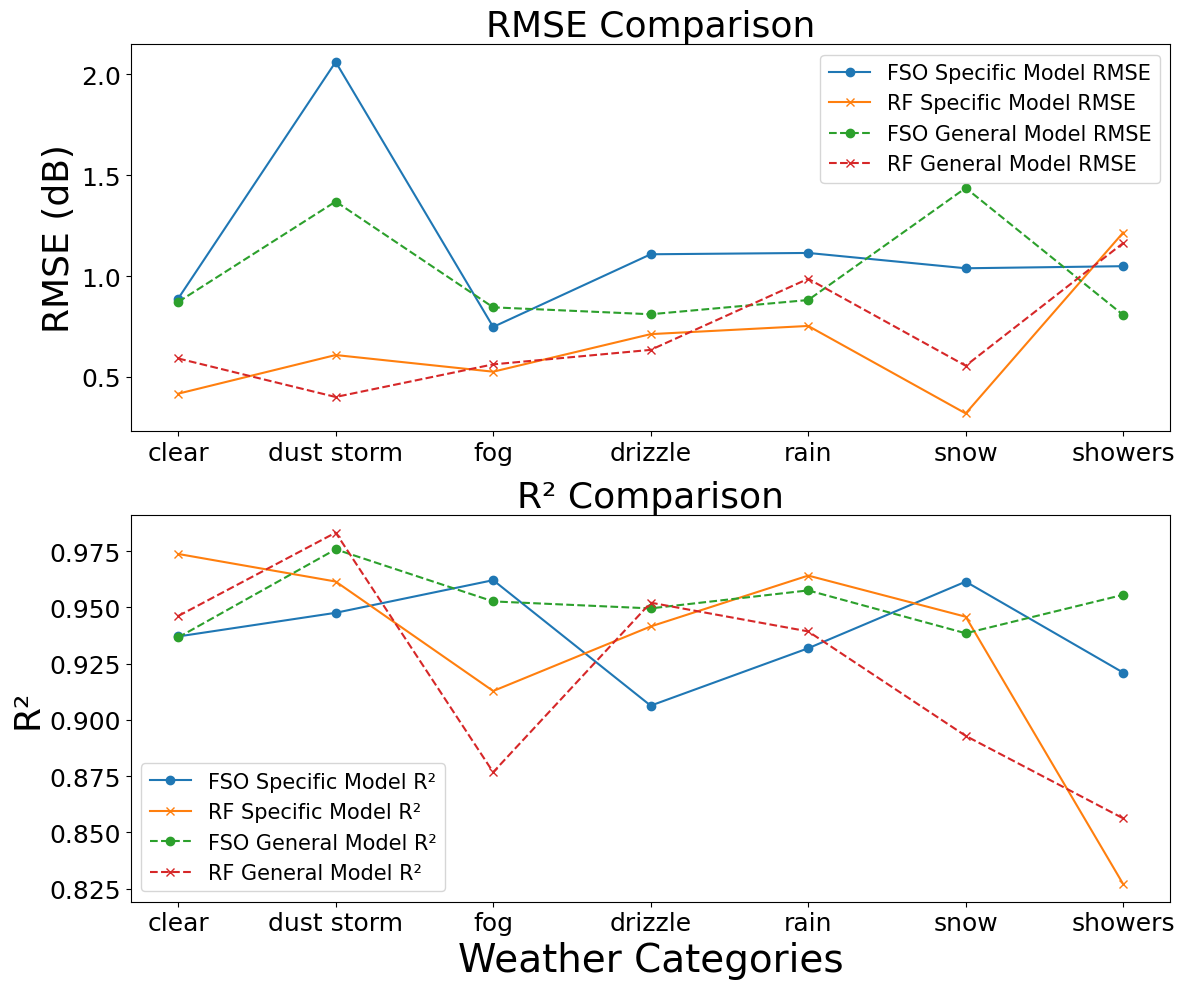

In [ ]:
# Specify sort order
category_order = [0, 3, 4, 5, 6, 7, 8]
category_labels = ['clear', 'dust storm', 'fog', 'drizzle', 'rain', 'snow', 'showers']

test_results_fso_df = test_results_fso_df.set_index('SYNOPCode').reindex(category_order).reset_index()
test_results_rf_df = test_results_rf_df.set_index('SYNOPCode').reindex(category_order).reset_index()

performance_fso_df = performance_fso_df.set_index('Category').reindex(category_order).reset_index()
performance_rf_df = performance_rf_df.set_index('Category').reindex(category_order).reset_index()

# FSO Specific Model
rmse_fso_specific = test_results_fso_df['RMSE_test']
r2_fso_specific = test_results_fso_df['R2_test']

# RF Specific Model
rmse_rf_specific = test_results_rf_df['RMSE_test']
r2_rf_specific = test_results_rf_df['R2_test']

# FSO General Model
rmse_fso_general = performance_fso_df['RMSE_test']
r2_fso_general = performance_fso_df['R2_test']

# RF General Model
rmse_rf_general = performance_rf_df['RMSE_test']
r2_rf_general = performance_rf_df['R2_test']

# Draw image
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# RMSE
axes[0].plot(category_labels, rmse_fso_specific, marker='o', label='FSO Specific Model RMSE')
axes[0].plot(category_labels, rmse_rf_specific, marker='x', label='RF Specific Model RMSE')
axes[0].plot(category_labels, rmse_fso_general, marker='o', linestyle='--', label='FSO General Model RMSE')
axes[0].plot(category_labels, rmse_rf_general, marker='x', linestyle='--', label='RF General Model RMSE')
axes[0].set_title('RMSE Comparison',fontsize=26)
axes[0].set_ylabel('RMSE (dB)',fontsize=26)
axes[0].tick_params(axis='both', which='major', labelsize=18)
axes[0].legend(fontsize=15)

# R²
axes[1].plot(category_labels, r2_fso_specific, marker='o', label='FSO Specific Model R²')
axes[1].plot(category_labels, r2_rf_specific, marker='x', label='RF Specific Model R²')
axes[1].plot(category_labels, r2_fso_general, marker='o', linestyle='--', label='FSO General Model R²')
axes[1].plot(category_labels, r2_rf_general, marker='x', linestyle='--', label='RF General Model R²')
axes[1].set_title('R² Comparison',fontsize=26)
axes[1].set_ylabel('R²',fontsize=26)
axes[1].tick_params(axis='both', which='major', labelsize=18)
axes[1].legend(fontsize=15)

plt.xlabel('Weather Categories',fontsize=28)
plt.tight_layout()
plt.show()
